# Linear Regression (incl. Slope Calculation) & Quadrant Analysis

## Financials


Sentiment Data Statistics:
       VADER Sentiment  FinBERT Sentiment  GPT Sentiment
count       362.000000         362.000000     362.000000
mean          1.211326           4.154696       0.193370
std           2.541393           3.511908       1.800292
min          -6.000000          -1.000000      -8.000000
25%           0.000000           2.000000      -1.000000
50%           1.000000           3.000000       0.000000
75%           2.000000           5.000000       1.000000
max          16.000000          28.000000       9.000000

Returns Data Statistics:
       Financials Return
count         362.000000
mean           -0.000833
std             0.017756
min            -0.052003
25%            -0.011808
50%            -0.001140
75%             0.009711
max             0.054517

Quadrant Counts:
            VADER  FinBERT  GPT
Quadrant 1    108      163   82
Quadrant 2    102      183   70
Quadrant 3     41        3   72
Quadrant 4     28        1   44


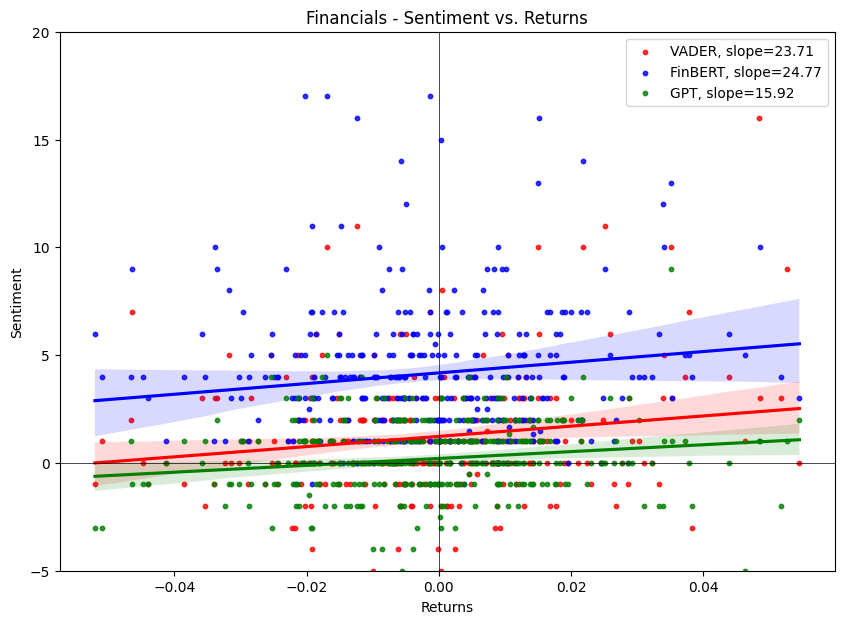

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load data
sentiment_data = pd.read_csv('Sentiment_Results_Financials_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Extract relevant columns
sentiments = sentiment_data[['Date', 'VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']]
returns = returns_data[['Date', 'Financials Return']]

# Merge datasets on Date, and only keep rows where both Sentiment and Return data are available
merged_data = pd.merge(sentiments, returns, on='Date', how='inner')

# Remove rows with missing values
merged_data = merged_data.dropna()

# Print the size of the merged data
#print(f"Merged Data Size: {merged_data.shape}")

# Display detailed information about the merged data
#print("\nMerged Data Information:")
#print(merged_data.info())

# Display basic statistics about the data
print("\nSentiment Data Statistics:")
print(sentiments.describe())
print("\nReturns Data Statistics:")
print(returns.describe())

# Compute slopes and create plots
fig, ax = plt.subplots(figsize=(10,7))

quadrant_counts = {'VADER': [], 'FinBERT': [], 'GPT': []}

for sentiment, color, label in zip(['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment'], ['red', 'blue', 'green'], ['VADER', 'FinBERT', 'GPT']):
    # Compute slope
    slope, _, _, _, _ = stats.linregress(merged_data['Financials Return'], merged_data[sentiment])
    
    # Create regression plot
    sns.regplot(x=merged_data['Financials Return'], y=merged_data[sentiment], color=color, label=f'{label}, slope={slope:.2f}', scatter_kws={'s':10}, ax=ax)

    # Count the number of points in each quadrant for the current sentiment type
    q1 = np.sum((merged_data['Financials Return'] > 0) & (merged_data[sentiment] > 0))
    q2 = np.sum((merged_data['Financials Return'] < 0) & (merged_data[sentiment] > 0))
    q3 = np.sum((merged_data['Financials Return'] < 0) & (merged_data[sentiment] < 0))
    q4 = np.sum((merged_data['Financials Return'] > 0) & (merged_data[sentiment] < 0))

    quadrant_counts[label] = [q1, q2, q3, q4]

# Draw x=0 and y=0 lines
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)

# Set the y-axis limit to a maximum of 100
ax.set_ylim(-5, 20)

# Display quadrant counts in a DataFrame
quadrant_df = pd.DataFrame(quadrant_counts, index=['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4'])
print("\nQuadrant Counts:")
print(quadrant_df)


plt.xlabel('Returns')
plt.ylabel('Sentiment')
plt.title('Financials - Sentiment vs. Returns')
plt.legend()

# Save the plot
plt.savefig('Graphics/1 Scatterplot Financials.png')

plt.show()



## Energy


Sentiment Data Statistics:
       VADER Sentiment  FinBERT Sentiment  GPT Sentiment
count       362.000000         362.000000     362.000000
mean          1.614641           4.480663       1.382597
std           2.337645           4.271228       1.976886
min          -4.000000          -2.000000      -2.000000
25%           0.000000           2.000000       0.000000
50%           1.000000           3.000000       1.000000
75%           3.000000           6.000000       2.000000
max          19.000000          43.000000      11.000000

Returns Data Statistics:
       Energy Return
count     362.000000
mean        0.002301
std         0.020400
min        -0.081671
25%        -0.010662
50%         0.002947
75%         0.016710
max         0.054092

Quadrant Counts:
            VADER  FinBERT  GPT
Quadrant 1    146      193  129
Quadrant 2    110      153  104
Quadrant 3     21        1   21
Quadrant 4     29        6   24


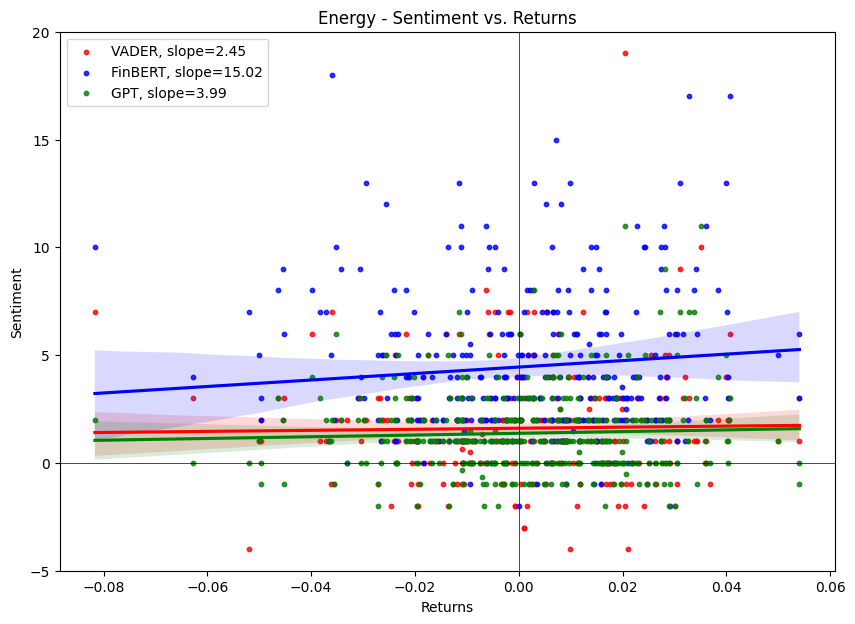

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load data
sentiment_data = pd.read_csv('Sentiment_Results_Energy_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Extract relevant columns
sentiments = sentiment_data[['Date', 'VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']]
returns = returns_data[['Date', 'Energy Return']]

# Merge datasets on Date, and only keep rows where both Sentiment and Return data are available
merged_data = pd.merge(sentiments, returns, on='Date', how='inner')

# Remove rows with missing values
merged_data = merged_data.dropna()

# Print the size of the merged data
#print(f"Merged Data Size: {merged_data.shape}")

# Display detailed information about the merged data
#print("\nMerged Data Information:")
#print(merged_data.info())

# Display basic statistics about the data
print("\nSentiment Data Statistics:")
print(sentiments.describe())
print("\nReturns Data Statistics:")
print(returns.describe())

# Compute slopes and create plots
fig, ax = plt.subplots(figsize=(10,7))

quadrant_counts = {'VADER': [], 'FinBERT': [], 'GPT': []}

for sentiment, color, label in zip(['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment'], ['red', 'blue', 'green'], ['VADER', 'FinBERT', 'GPT']):
    # Compute slope
    slope, _, _, _, _ = stats.linregress(merged_data['Energy Return'], merged_data[sentiment])
    
    # Create regression plot
    sns.regplot(x=merged_data['Energy Return'], y=merged_data[sentiment], color=color, label=f'{label}, slope={slope:.2f}', scatter_kws={'s':10}, ax=ax)

    # Count the number of points in each quadrant for the current sentiment type
    q1 = np.sum((merged_data['Energy Return'] > 0) & (merged_data[sentiment] > 0))
    q2 = np.sum((merged_data['Energy Return'] < 0) & (merged_data[sentiment] > 0))
    q3 = np.sum((merged_data['Energy Return'] < 0) & (merged_data[sentiment] < 0))
    q4 = np.sum((merged_data['Energy Return'] > 0) & (merged_data[sentiment] < 0))

    quadrant_counts[label] = [q1, q2, q3, q4]

# Draw x=0 and y=0 lines
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)

# Set the y-axis limit to a maximum of 100
ax.set_ylim(-5, 20)

# Display quadrant counts in a DataFrame
quadrant_df = pd.DataFrame(quadrant_counts, index=['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4'])
print("\nQuadrant Counts:")
print(quadrant_df)


plt.xlabel('Returns')
plt.ylabel('Sentiment')
plt.title('Energy - Sentiment vs. Returns')
plt.legend()

# Save the plot
plt.savefig('Graphics/1 Scatterplot Energy.png')

plt.show()



## Technology


Sentiment Data Statistics:
       VADER Sentiment  FinBERT Sentiment  GPT Sentiment
count       362.000000         362.000000     362.000000
mean         13.591160          45.668508       3.801105
std           8.713903          23.787391       8.590673
min          -4.000000          11.000000     -34.000000
25%           8.000000          31.250000       0.000000
50%          13.000000          41.000000       3.000000
75%          17.000000          52.000000       7.000000
max          55.000000         204.000000      51.000000

Returns Data Statistics:
       Technology Return
count         362.000000
mean           -0.001610
std             0.020244
min            -0.064178
25%            -0.014965
50%            -0.002713
75%             0.011454
max             0.083156

Quadrant Counts:
            VADER  FinBERT  GPT
Quadrant 1    160      166  121
Quadrant 2    191      196  136
Quadrant 3      4        0   50
Quadrant 4      4        0   37


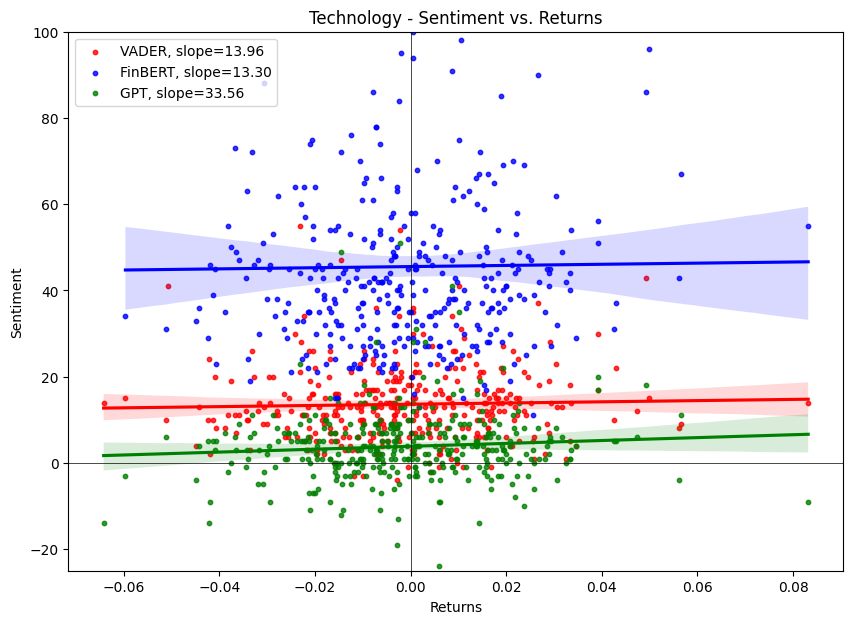

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Load data
sentiment_data = pd.read_csv('Sentiment_Results_Technology_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Extract relevant columns
sentiments = sentiment_data[['Date', 'VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']]
returns = returns_data[['Date', 'Technology Return']]

# Merge datasets on Date, and only keep rows where both Sentiment and Return data are available
merged_data = pd.merge(sentiments, returns, on='Date', how='inner')

# Remove rows with missing values
merged_data = merged_data.dropna()

# Sort the data by 'Technology Return' column in ascending order
merged_data.sort_values(by='Technology Return', ascending=True, inplace=True)

# Remove the second lowest value for FinBERT and keep the lowest return and the rest
finbert_data = merged_data.iloc[1:].copy()

# Display basic statistics about the data
print("\nSentiment Data Statistics:")
print(sentiments.describe())
print("\nReturns Data Statistics:")
print(returns.describe())

# Compute slopes and create plots
fig, ax = plt.subplots(figsize=(10, 7))

quadrant_counts = {'VADER': [], 'FinBERT': [], 'GPT': []}

for sentiment, color, label in zip(['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment'], ['red', 'blue', 'green'], ['VADER', 'FinBERT', 'GPT']):
    if sentiment == 'FinBERT Sentiment':
        # Calculate the slope for FinBERT data
        slope, _, _, _, _ = stats.linregress(finbert_data['Technology Return'], finbert_data[sentiment])
        
        # Plot the trendline for FinBERT with the correct slope
        sns.regplot(x=finbert_data['Technology Return'], y=finbert_data[sentiment], color=color, label=f'{label}, slope={slope:.2f}', scatter_kws={'s': 10}, ax=ax)
    else:
        slope, _, _, _, _ = stats.linregress(merged_data['Technology Return'], merged_data[sentiment])
        # Create regression plot for the original data
        sns.regplot(x=merged_data['Technology Return'], y=merged_data[sentiment], color=color, label=f'{label}, slope={slope:.2f}', scatter_kws={'s': 10}, ax=ax)

    # Count the number of points in each quadrant for the current sentiment type
    q1 = np.sum((merged_data['Technology Return'] > 0) & (merged_data[sentiment] > 0))
    q2 = np.sum((merged_data['Technology Return'] < 0) & (merged_data[sentiment] > 0))
    q3 = np.sum((merged_data['Technology Return'] < 0) & (merged_data[sentiment] < 0))
    q4 = np.sum((merged_data['Technology Return'] > 0) & (merged_data[sentiment] < 0))

    quadrant_counts[label] = [q1, q2, q3, q4]

# Draw x=0 and y=0 lines
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)

# Set the y-axis limit to a maximum of 100
ax.set_ylim(-25, 100)

# Display quadrant counts in a DataFrame
quadrant_df = pd.DataFrame(quadrant_counts, index=['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4'])
print("\nQuadrant Counts:")
print(quadrant_df)

plt.xlabel('Returns')
plt.ylabel('Sentiment')
plt.title('Technology - Sentiment vs. Returns')
plt.legend()

# Save the plot
plt.savefig('Graphics/1 Scatterplot Technology.png')

plt.show()


_______________________________________________________________________________________________________________________________________

# Test for Linearity
#### Test if linear Models can be used

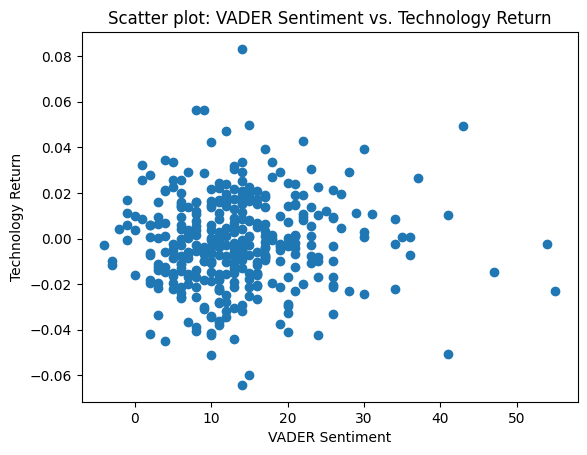

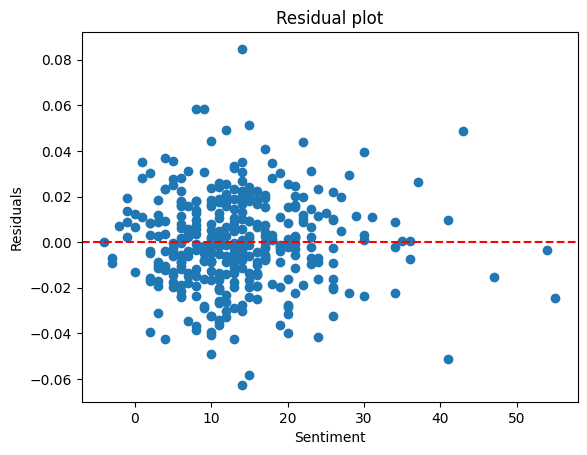

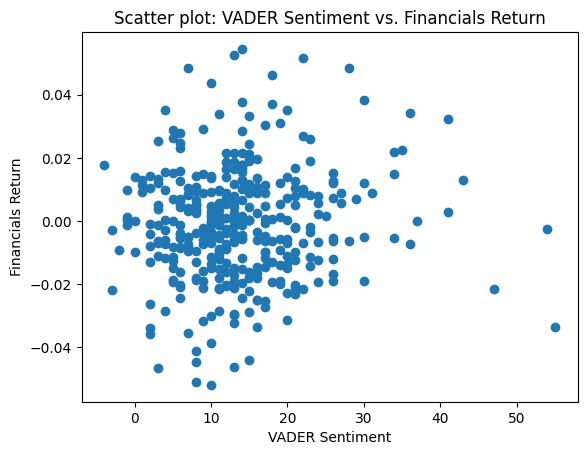

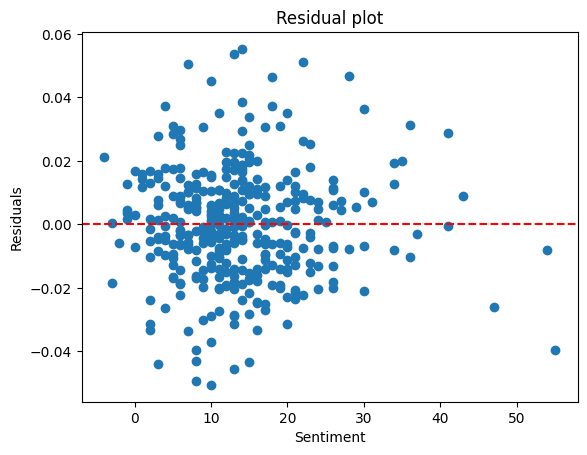

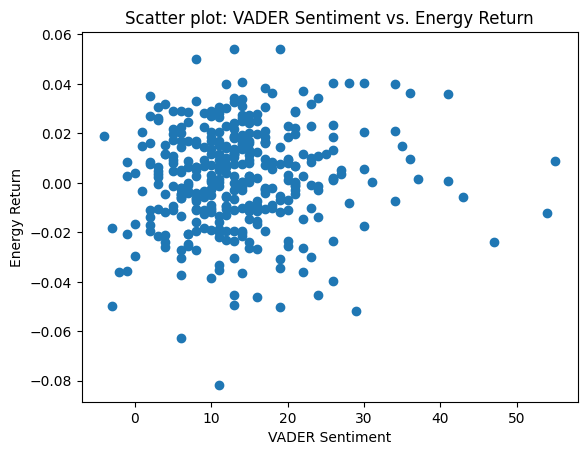

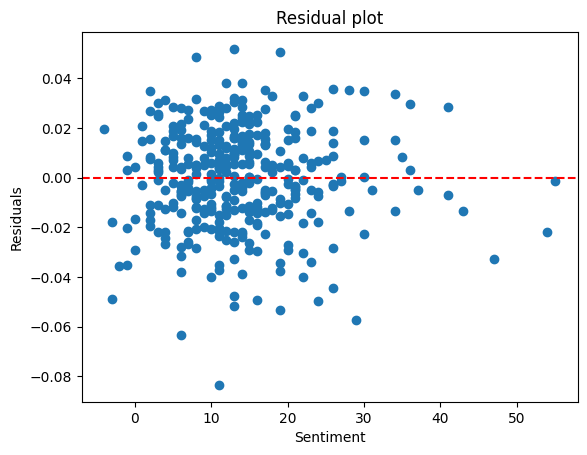

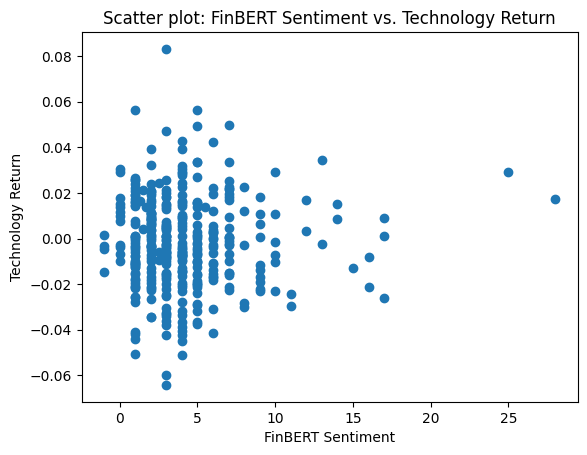

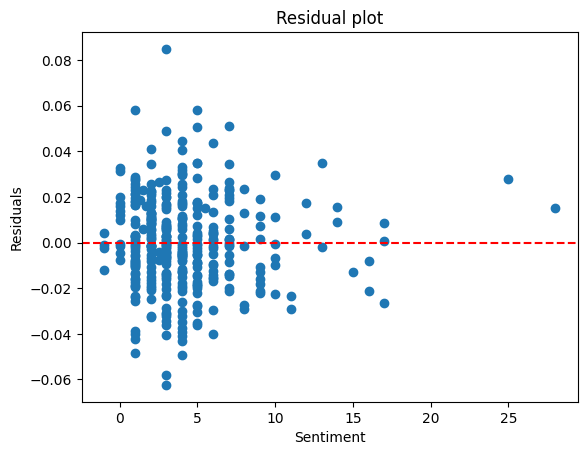

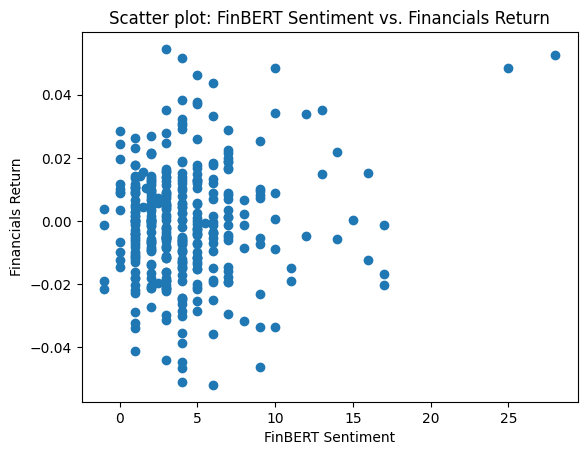

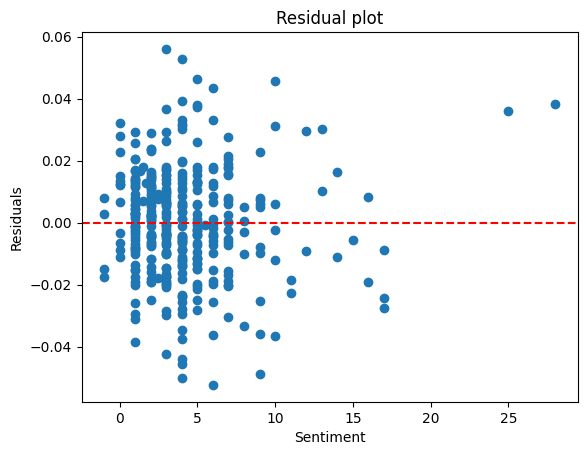

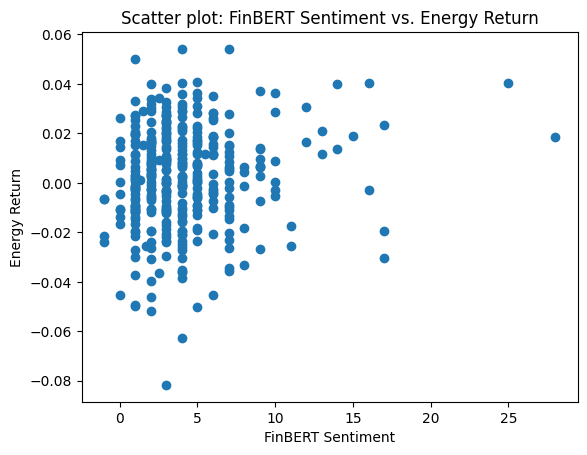

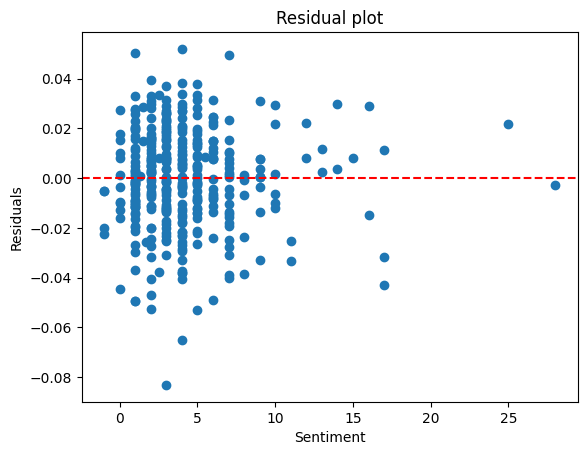

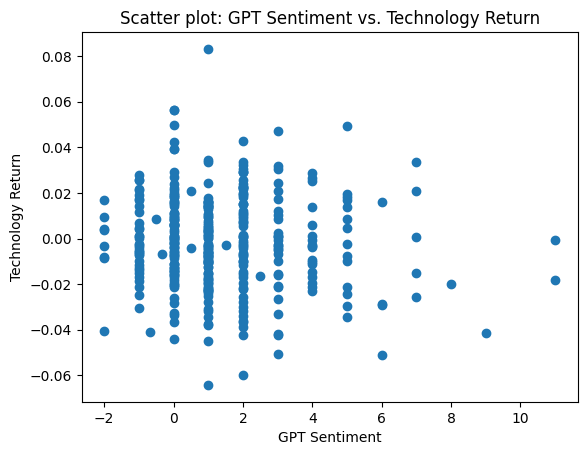

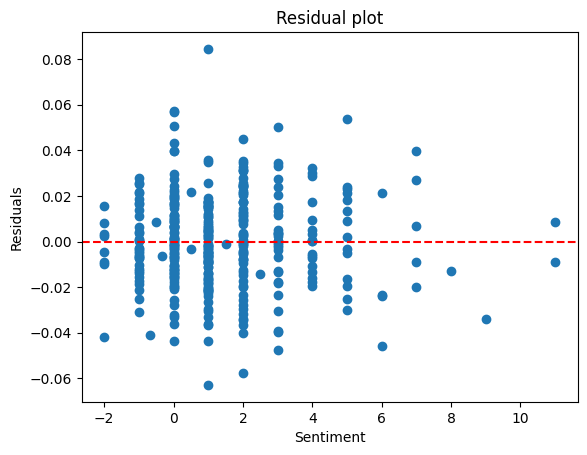

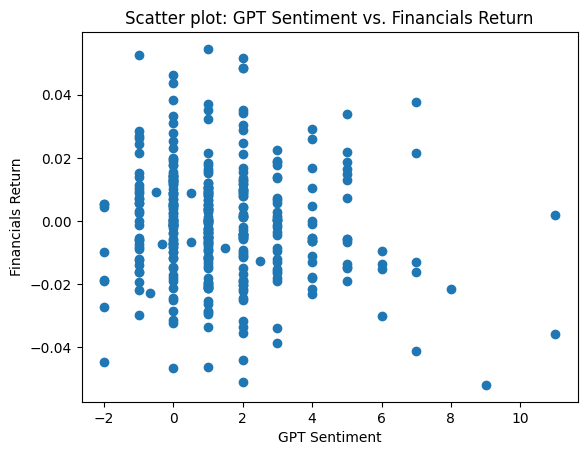

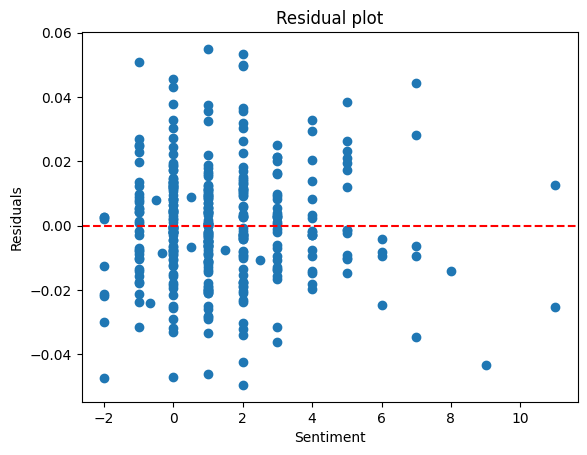

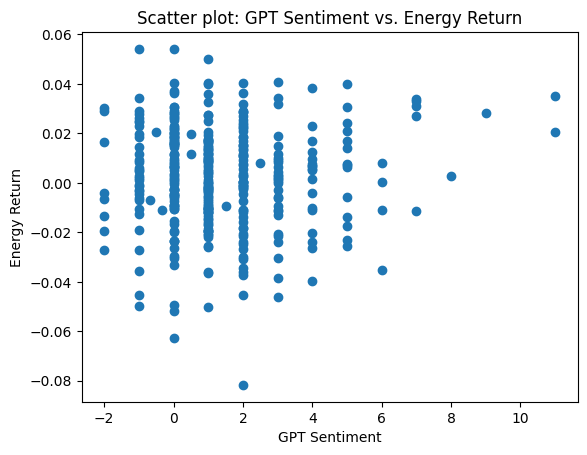

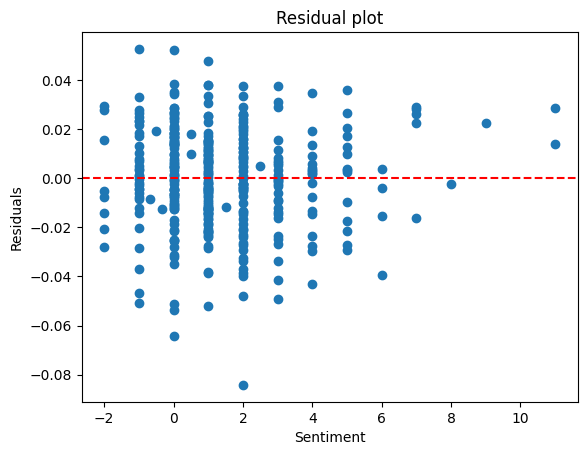

           Sentiment             Return  Ramsey p-value  Linear Fit
0    VADER Sentiment  Technology Return        0.459649       False
1    VADER Sentiment  Financials Return        0.032928       False
2    VADER Sentiment      Energy Return        0.252700       False
3  FinBERT Sentiment  Technology Return        0.471376       False
4  FinBERT Sentiment  Financials Return        0.001578       False
5  FinBERT Sentiment      Energy Return        0.064977       False
6      GPT Sentiment  Technology Return        0.464653       False
7      GPT Sentiment  Financials Return        0.057303       False
8      GPT Sentiment      Energy Return        0.053540       False


In [77]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load data
sentiment_data_financials = pd.read_csv('Sentiment_Results_Financials_Sum.csv')
sentiment_data_energy = pd.read_csv('Sentiment_Results_Energy_Sum.csv')
sentiment_data_technology = pd.read_csv('Sentiment_Results_Technology_Sum.csv')
returns_data = pd.read_csv('Portfolio_Returns_Linear.csv')

# Define the sentiments and returns
sentiments = ['VADER Sentiment', 'FinBERT Sentiment', 'GPT Sentiment']
returns = ['Technology Return', 'Financials Return', 'Energy Return']

# Helper function to perform Ramsey's RESET test
def ramsey_reset_test(X, y, degree=3):
    X_degrees = [X, X**2, X**3][:degree]
    X_degrees = sm.add_constant(np.column_stack(X_degrees))
    model = sm.OLS(y, X_degrees).fit()
    f_stat = model.f_pvalue
    return f_stat

# Helper function to check if the residual plot shows a linear fit
def check_linear_fit(X, y, y_pred):
    plt.scatter(X, y - y_pred)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('Sentiment')
    plt.ylabel('Residuals')
    plt.title('Residual plot')
    plt.show()
# Initialize an empty list to store the results
results = []

# Loop through each sentiment and return pair and create scatter, residual, and RESET test plots
for sentiment in sentiments:
    for ret in returns:
        # Extract data
        sentiment_data = sentiment_data_technology if sentiment == 'VADER Sentiment' else \
                         sentiment_data_financials if sentiment == 'FinBERT Sentiment' else \
                         sentiment_data_energy
        X = sentiment_data[sentiment].values.reshape(-1, 1)
        y = returns_data[ret].values
        
        # Create scatter plot
        plt.scatter(X, y)
        plt.xlabel(sentiment)
        plt.ylabel(ret)
        plt.title(f'Scatter plot: {sentiment} vs. {ret}')
        plt.show()
        
        # Fit linear regression model
        lr = LinearRegression()
        lr.fit(X, y)
        y_pred = lr.predict(X)
        
        # Check if the residual plot shows a linear fit
        is_linear_fit = np.allclose(y - y_pred, 0)  # Check if residuals are close to 0
        check_linear_fit(X, y, y_pred)  # Display the residual plot
        
        # Perform Ramsey's RESET test
        f_stat = ramsey_reset_test(X, y)
        
        # Append the results to the list
        results.append({
            'Sentiment': sentiment,
            'Return': ret,
            'Ramsey p-value': f_stat,
            'Linear Fit': is_linear_fit
        })

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)